<a href="https://colab.research.google.com/github/wellia/Machine_Learning/blob/main/housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from pandas import DataFrame

%matplotlib inline

# accomodate display all columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# load data
df_housing =  pd.read_csv('housing_dataset.csv')

# do data cleaning when it's necessary
# check columns that have null values
null_columns=df_housing.columns[df_housing.isnull().any()]
print('Columns that have missing values are')
df_housing[null_columns].isnull().sum()

# only column total_bedrooms that has null values. 
# I keep it as it is, I assume null as unknown value instead of 0. The system will ignore null values when calculating the mean

Columns that have missing values are


total_bedrooms    207
dtype: int64



##**Part-1: Basic Calculations:**


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

I use Haversine instead of Vincenty because of its simplicity. Its lack of accuracy is not a major issue in selecting a housing

Reference for haversine_distance function: Medium. 2020. Here’S How To Calculate Distance Between 2 Geolocations In Python. [online] Available at: https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4 [Accessed 25 July 2020].

In [ ]:
# define haversine distance function
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

# load data
df_housing =  pd.read_csv('housing_dataset.csv')

# get first row
start_lon = df_housing['longitude'].iloc[0] 
start_lat = df_housing['latitude'].iloc[0]

# calculate distance from the first row house
distances_km = []
for row in df_housing.itertuples(index=False):
    distances_km.append(
        haversine_distance(start_lat, start_lon, row.latitude, row.longitude)
    )

df_housing['distances'] = distances_km

nearest_distance = df_housing['distances'].nsmallest(2).iloc[1]
fartherst_distance = df_housing['distances'].max()

df_housing.drop(['distances'], axis=1)

print('Nearest distance:', round(nearest_distance, 2), 'km')
print('Fartherst house:', round(fartherst_distance, 2), 'km')

Nearest distance: 0.88 km
Fartherst house: 896.28 km


2.   Calculate the average age of the house blocks near the ocean.

In [ ]:
# filter by near ocean and calculate the average house_age
df_near_ocean_houses = df_housing.loc[df_housing['ocean_proximity'] == 'NEAR OCEAN']
average_age = df_near_ocean_houses.housing_age.mean()
print('Average age of houses near the ocean is %.2f years' % round(average_age, 2))

Average age of houses near the ocean is 29.35 years


3.   Find the income of the housing block with the most and least population density (per family).

In [ ]:
# calculate population density (population / family)
df_housing['density'] = df_housing.population / df_housing.families

# find the most and least dense
most_dense = df_housing['density'].max()
least_dense = df_housing['density'].min()
print(most_dense)
print(least_dense)

# find records that have most and least density
df_housing_most_dense = df_housing.loc[df_housing['density'] == most_dense]
df_housing_least_dense = df_housing.loc[df_housing['density'] == least_dense]

# calculate income of most and least density
average_income_most_dense = df_housing_most_dense.average_income.mean() * 1000
average_income_least_dense = df_housing_least_dense.average_income.mean() * 1000

# clean up data
df_housing.drop(['density'], axis=1, inplace=True)

print('Average income of the most dense population (per family) is ${:0,.2f}/month'.format(average_income_most_dense))
print('Average income of the least dense population (per family) is ${:0,.2f}/month'.format(average_income_least_dense))

1243.3333333333333
0.6923076923076923
Average income of the most dense population (per family) is $10,226.40/month
Average income of the least dense population (per family) is $2,589.30/month


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [ ]:
# find oldest and latest housing blocks
oldest_housing = df_housing['housing_age'].max()
latest_housing = df_housing['housing_age'].min()

# find records that match the oldest and latest housing age
df_oldest = df_housing.loc[df_housing['housing_age'] == oldest_housing]
df_latest = df_housing.loc[df_housing['housing_age'] == latest_housing]

# use mean instead sum 
# to have a meaningful comparison value using sum, those 2 housing blocks must have the same number of housing.
average_price_oldest = df_oldest.house_value.mean()
average_price_latest = df_latest.house_value.mean()

# calculate price difference
price_difference = average_price_oldest - average_price_latest

print ('In average price, the oldest is ${:0,.2f} more than and latest housings'.format(price_difference))


In average price, the oldest is $131,120.87 more than and latest housings


5.   Calculate the cheapest price per room from the dataset.

In [ ]:
# calculate cheapest price per room
# house_value is per house whereas total_rooms is per housing block
# we must convert house_value into house_value per housing block by multiple by n value. n can be any value, here n = 10
price_per_room_list = df_housing.house_value * 10 / df_housing.total_rooms
print ('The cheapest price per room is ${:0,.2f}'.format(price_per_room_list.min()))

The cheapest price per room is $15.95


6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [ ]:
# calculate the most and least wealthy using average_income instead of house_value because we don't have information
# whether the house is owner occupant owner-occupied property
most_wealthy = df_housing['average_income'].max()
least_wealthy = df_housing['average_income'].min()

# find housings that match the definition most and least wealthy
df_most_wealthy = df_housing.loc[df_housing['average_income'] == most_wealthy]
df_least_wealthy = df_housing.loc[df_housing['average_income'] == least_wealthy]

# calculate population density
density_most_wealthy = df_most_wealthy.population / df_most_wealthy.families
density_least_wealthy = df_least_wealthy.population / df_least_wealthy.families

print ('The average density in most wealthy housing is %.2f and in least wealthy housing is %.2f' 
       % (density_most_wealthy.mean(), density_least_wealthy.mean()))

3.307545896889619
The average density in most wealthy housing is 3.31 and in least wealthy housing is 3.48


7.   Calculate and print the total housing blocks located in the same place.

In [ ]:
# Assumption: same place means same longitude and latitude

# count how many housings that belong to the same location
df_place = DataFrame({'totalHousingBlocks' : df_housing.groupby( ['longitude', 'latitude'] ).size()}).reset_index()

# only interest in data which there are more than 1 housing in the group
df_place = df_place[df_place.totalHousingBlocks > 1]

print('List of total housing blocks located in the same place\n')
print(df_place)


List of total housing blocks located in the same place

       longitude  latitude  totalHousingBlocks
18       -124.18     40.78                   3
19       -124.18     40.79                   2
27       -124.17     40.80                   3
32       -124.16     40.78                   3
33       -124.16     40.79                   3
...          ...       ...                 ...
12531    -115.52     32.97                   2
12532    -115.52     32.98                   2
12543    -115.49     32.67                   3
12555    -115.37     32.81                   2
12556    -115.37     32.82                   2

[4353 rows x 3 columns]


8.   Calculate the price of expensive room grouped by ocean proximity.

In [ ]:
# Assume there are the same number of houses in a block (n = 10) 
df_housing['price_per_room'] = round((df_housing.house_value * 10)/df_housing.total_rooms, 2)

df_rooms = df_housing.groupby("ocean_proximity")["price_per_room"].max()

# clean up data
df_housing.drop(['price_per_room'], axis=1, inplace=True)

df_rooms



ocean_proximity
<1H OCEAN     225000.00
INLAND        687500.00
ISLAND          4518.07
NEAR BAY      625001.25
NEAR OCEAN    233333.33
Name: price_per_room, dtype: float64

##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

Conclusion: There is a weak negative linear relationship between population and housing age, population slightly decreases as housing ages. Majority of population are at 5,000 and under. There are a couple potential outliers at population above 25,000.

For population vs ocean_proximity; I cannot conclude the trend/relationship since those ocean proximities are nominal data. The graph shows that most people live inland or '< 1h OCEAN'. Some live near ocean and a small number of people live on islands. There are potential outliers at '< 1H OCEAN' and population above 25,000

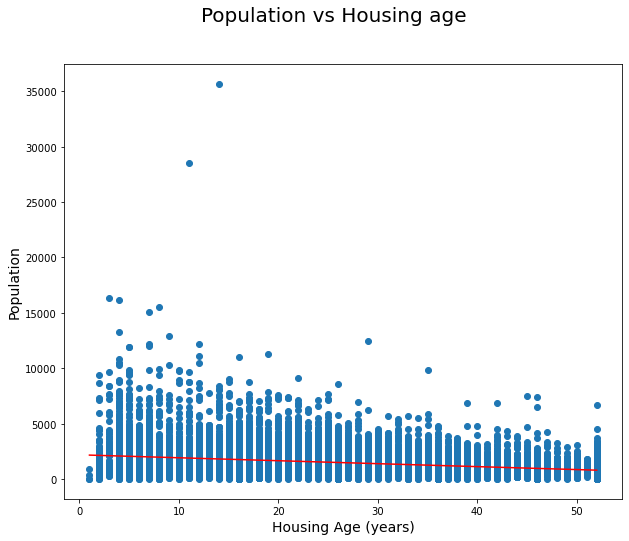

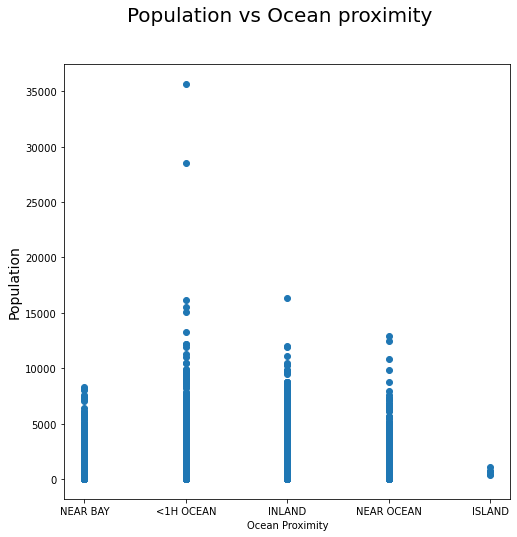

In [ ]:
x = df_housing.housing_age
y = df_housing.population

# plot it
fig = plt.figure(figsize=(10, 8))
plt.scatter(x, y)

# add trend line
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='r')

fig.suptitle('Population vs Housing age', fontsize=20)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Housing Age (years)', fontsize=14)
plt.show()

fig = plt.figure(figsize=(8, 8))
x = df_housing.ocean_proximity
plt.scatter(x, y)
fig.suptitle('Population vs Ocean proximity', fontsize=20)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Ocean Proximity')
plt.show()


2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

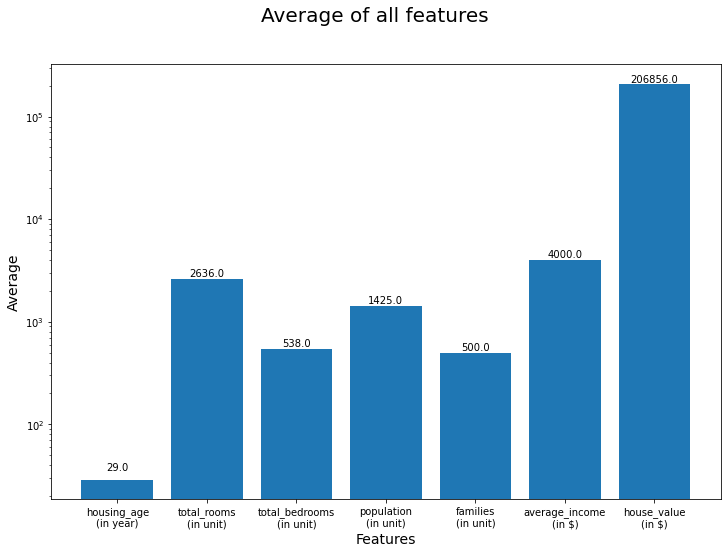

In [ ]:
# use log as y axis to accomodate large scale ranges.
# add unit measurements in x-axis labels to accomodate different measurement units
# add mean value on top of the bars to better visualisation of important value

included_cols = {'housing_age':'year','total_rooms':'unit','total_bedrooms':'unit',
                 'population':'unit','families': 'unit','average_income':'$','house_value':'$'}
col_list = included_cols.keys()
x = []
y = []
y_labels = []

for col in df_housing.columns:
    if col in col_list:
        average = round(df_housing[col].mean(),0)
        if (col == 'average_income'):
            average = average * 1000
        x.append(col)
        y.append(average)
        y_labels.append(col + '\n(in ' + included_cols[col] + ')')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig.suptitle('Average of all features', fontsize=20)
plt.ylabel('Average', fontsize=14)
plt.xlabel('Features', fontsize=14)
ax.bar(x, y)

plt.yscale('log',basey=10) 
ax.set_xticklabels(y_labels)

# make labels 
rects = ax.patches
labels = []
for i in range(len(rects)):
    labels.append(y[i])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

Text(0.5, 0.98, 'The differences in housing prices from the average')

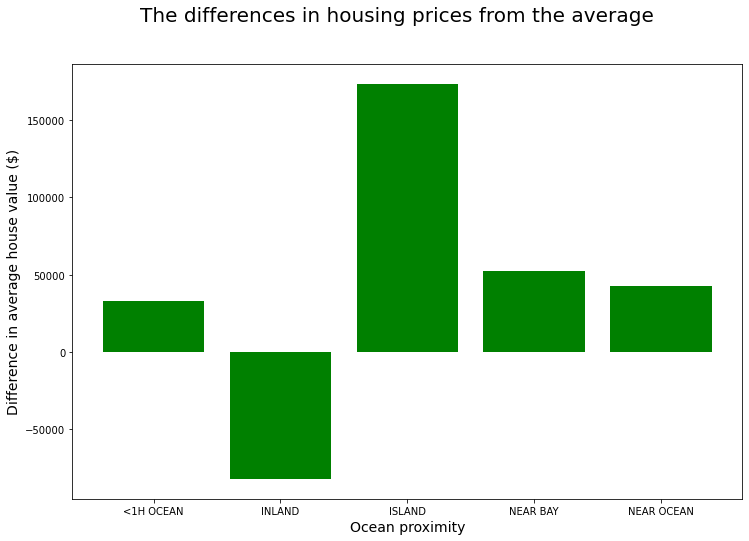

In [ ]:
# average house for all 
average_house_value = df_housing.house_value.mean()

# note that there are too many housings therefore it is more beneficial if we categorise them into ocean_proximity

# get house value for each ocean_proximity
ocean_proximity = df_housing.groupby("ocean_proximity")["house_value"].mean()
df_ocean_proximity = ocean_proximity.to_frame().reset_index()

# calculate difference house value with average house 
df_ocean_proximity['house_value_difference'] = df_ocean_proximity.house_value - average_house_value

# plot it
fig = plt.figure(figsize=(12, 8))
plt.bar(df_ocean_proximity.ocean_proximity, df_ocean_proximity.house_value_difference, color='green')
plt.xlabel('Ocean proximity', fontsize=14)
plt.ylabel('Difference in average house value ($)', fontsize=14)
fig.suptitle('The differences in housing prices from the average', fontsize=20)



##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [ ]:
import os

file_name = 'new_housing_dataset.csv'

# remove if file is exists
if os.path.exists(file_name):
  os.remove(file_name)

# filter by near ocean and house value lower than average house value
average_house_value = df_housing.house_value.mean()
df_filter = df_housing[(df_housing.ocean_proximity == 'NEAR OCEAN') & (df_housing.house_value < average_house_value)]

# save to the default directory
df_filter.to_csv('new_housing_dataset.csv', index=False) 

# read back to verify the content
if os.path.exists(file_name):
  df_filter =  pd.read_csv(file_name)
  print(df_filter.head())


   longitude  latitude  housing_age  total_rooms  total_bedrooms  population  families  average_income ocean_proximity  house_value  distances
0    -124.17     41.80           16         2739           480.0        1259       436          3.7557      NEAR OCEAN       109400     466.26
1    -124.30     41.80           19         2672           552.0        1298       478          1.9797      NEAR OCEAN        85800     470.31
2    -124.23     41.75           11         3159           616.0        1343       479          2.4805      NEAR OCEAN        73200     462.95
3    -124.21     41.77           17         3461           722.0        1947       647          2.5795      NEAR OCEAN        68400     464.39
4    -124.19     41.78           15         3140           714.0        1645       640          1.6654      NEAR OCEAN        74600     464.80


2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.


In [ ]:
# target file name
file_name = 'new2_housing_dataset.csv'

# remove if file is exists
if os.path.exists(file_name):
  os.remove(file_name)

# select columns
df_filter = df_housing[['longitude', 'latitude', 'total_rooms', 'house_value']]

# save to file
df_filter.to_csv(file_name, index=False) 

# read back to verify the content
if os.path.exists(file_name):
  df_filter =  pd.read_csv(file_name)
  print(df_filter.head())



   longitude  latitude  total_rooms  house_value
0    -122.23     37.88          880       452600
1    -122.22     37.86         7099       358500
2    -122.24     37.85         1467       352100
3    -122.25     37.85         1274       341300
4    -122.25     37.85         1627       342200
